In [1]:
import seaborn as sns
tip = sns.load_dataset('tips')
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: ylabel='size'>

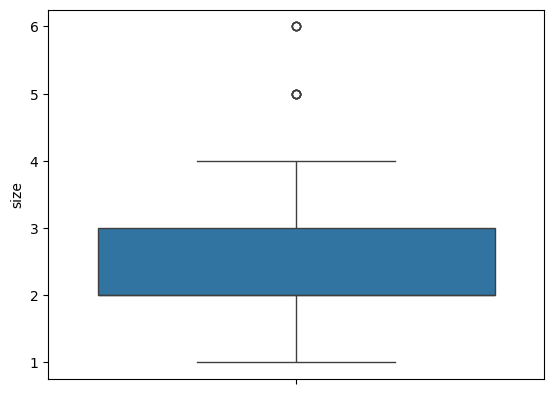

In [4]:
sns.boxplot(tip['size'])

<Axes: ylabel='total_bill'>

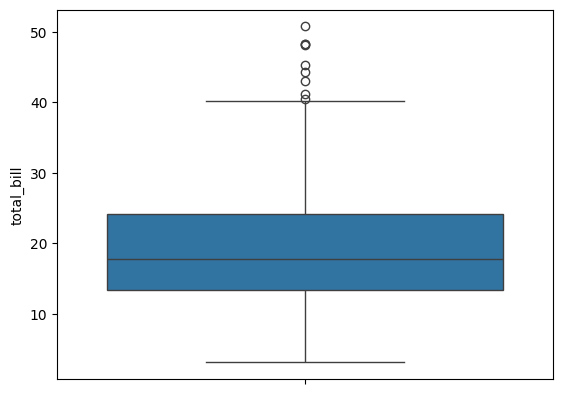

In [5]:
sns.boxplot(tip['total_bill'])

<Axes: ylabel='total_bill'>

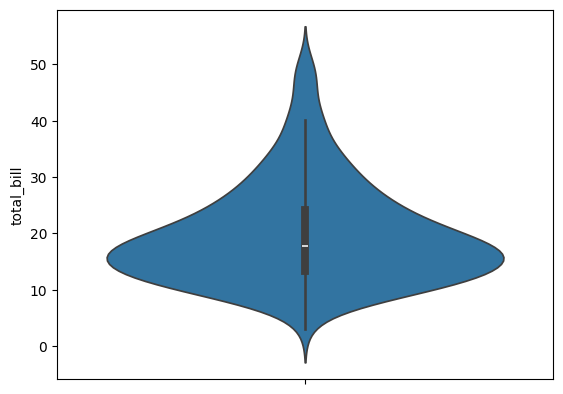

In [8]:
sns.violinplot(tip['total_bill'])

<Axes: ylabel='size'>

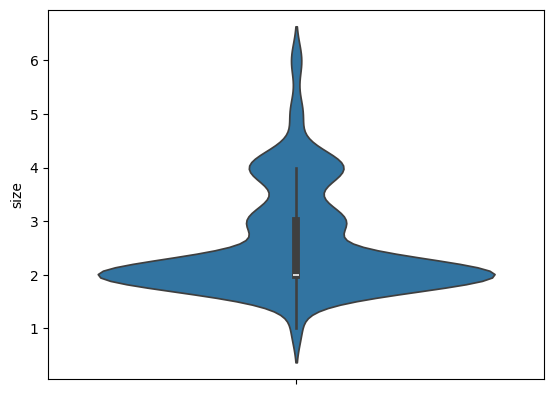

In [9]:
sns.violinplot(tip['size'])

In [10]:
import numpy as np 
age = [2,3,4,5,6,6,2,2,2,33,55,67,88,1,1,22,3,3,3,4,5,55,5,5,33,65,8,6]
percentile_25 = np.percentile(age,[25])
percentile_75 = np.percentile(age,[75])
IQR = percentile_75 - percentile_25
IQR

array([21.75])

In [11]:
lower_fence = percentile_25 - 1.5*IQR 
lower_fence

array([-29.625])

In [12]:
higher_fence = percentile_75 + 1.5*IQR 
higher_fence

array([57.375])

<Axes: >

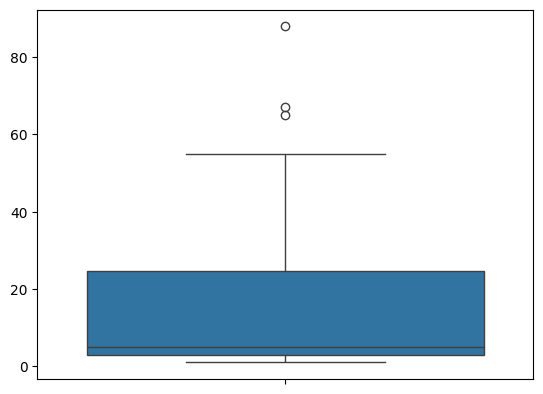

In [13]:
sns.boxplot(age)

In [14]:
dataset = [1,2,3,4,4,4,5,5,5,3,3,3,2,2,26,6,6,6,6,7,7,7,8]
per_25 = np.percentile(dataset,[25])
per_25

array([3.])

In [15]:
per_75 = np.percentile(dataset,[75])
per_75

array([6.])

In [16]:
IQR1 = per_75 - per_25
IQR1

array([3.])

In [17]:
lower_fence1 = per_25 - 1.5*IQR1
lower_fence1

array([-1.5])

In [18]:
higher_fence1 = per_75 + 1.5*IQR1
higher_fence1

array([10.5])

<Axes: >

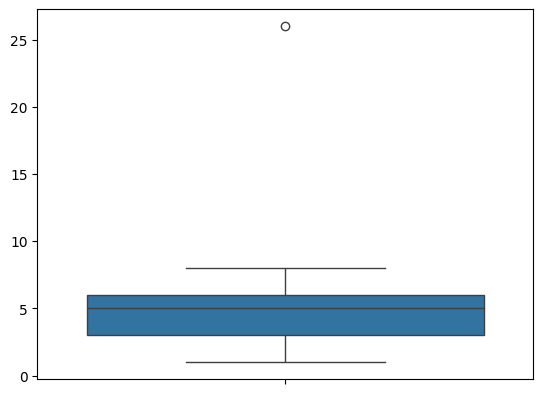

In [19]:
sns.boxplot(dataset)

In [20]:
arr = [1,-2,1]
n = 2 
k = 3
n*k

6

In [21]:
def sum(arr,n,k):
    concat = arr*k
    csum = 0
    msum = 0
    for i in range(n*k):
        csum = csum + concat[i%n]
        if csum > msum:
            msum = csum
        if csum < 0:
            csum = 0
            
    return csum

arr = [1,-2,1]
n = 3 
k = 2
sum(arr,n,k)

1

## Outliers

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

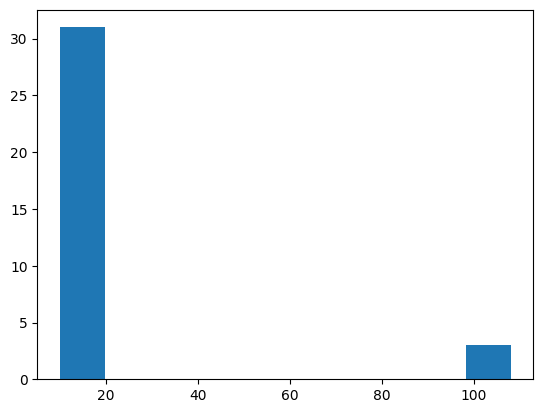

In [23]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
plt.hist(dataset)

In [24]:
# Z Scores
outliers = []

def detect_outliers(data):
    threshold = 3 # 3 std deviation
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [27]:
mean = np.mean(dataset)
print("Mean :-",mean)
std = np.std(dataset)
print("STD:-",std)
z_score = (11 - mean) / std
print("Z-Score:-",z_score)

Mean :- 21.176470588235293
STD:- 26.37230118696876
Z-Score:- -0.38587723217963826


In [25]:
detect_outliers(dataset)

[102, 107, 108]

## IQR
1. Sort the data
2. Calculate Q1 and Q3
3. IQR = Q3 - Q1
4. Find the Lower Fence = Q1 - 1.5*IQR
5. Find the Upper Fence = Q3 + 1.5*IQR

In [37]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [38]:
## Sort the data
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [39]:
Q1,Q3 = np.percentile(dataset,[25,75])
print(Q1,Q3)

12.0 15.0


In [40]:
IQR2 = Q3 - Q1 
IQR2 

3.0

In [41]:
lower_fence2 = Q1 - 1.5*IQR2
lower_fence2 

7.5

In [42]:
higher_fence2 = Q3 + 1.5*IQR2
higher_fence2

19.5

<Axes: >

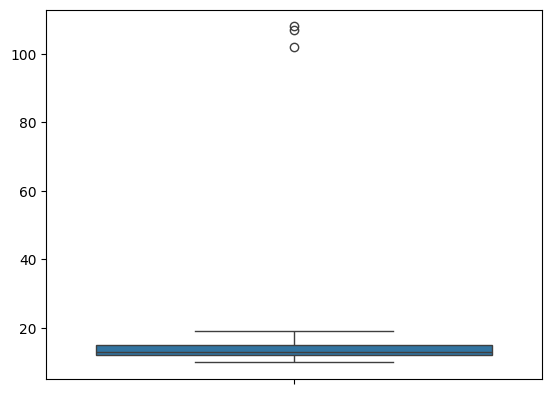

In [43]:
sns.boxplot(dataset)

In [45]:
import statsmodels.api as sm 
import pylab as py 

In [46]:
#Standard Normal Distribution 
np.random.normal(0,1,90) # 0 = Mean , 1 = STD

array([ 1.26706634,  1.07002052,  0.21772431, -0.55197315, -0.2366649 ,
        0.89147042,  0.59524474, -0.35665456, -0.59243023, -0.64660799,
        0.43261249,  0.66709003,  1.31605682, -0.06906116, -0.86312927,
       -1.48589445, -0.52823027,  1.25271297, -0.29424537, -1.14193518,
       -0.5271095 , -0.67830562, -0.18394474,  0.67947849, -1.52184572,
        0.19983476,  1.17803686,  1.47857678, -0.81092984, -1.43440725,
       -0.9193014 ,  1.22560928,  0.95427522,  0.68540189,  0.39916435,
       -2.30689314, -0.9940877 , -0.76608789, -0.21541906, -0.27624279,
       -0.86468546, -0.1824351 , -1.21214689,  0.42891896, -0.82826862,
        0.23316754, -0.27366974, -0.20845527, -0.00908567, -0.11672476,
       -0.64204116,  0.79411432, -1.43892593, -1.48717901, -0.41897767,
       -0.40726976, -1.04457944,  0.82861793, -1.48556792,  0.45040943,
       -0.93919487,  0.08528427,  1.09682741, -1.04152067, -0.16545657,
        0.01825021,  1.13572242, -0.91598123, -0.68221807,  2.56

## Q-Q Plot

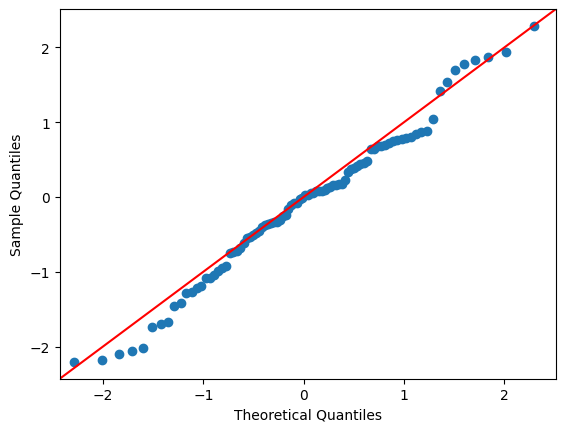

In [47]:
data_points = np.random.normal(0,1,90)
sm.qqplot(data_points,line='45')
py.show()

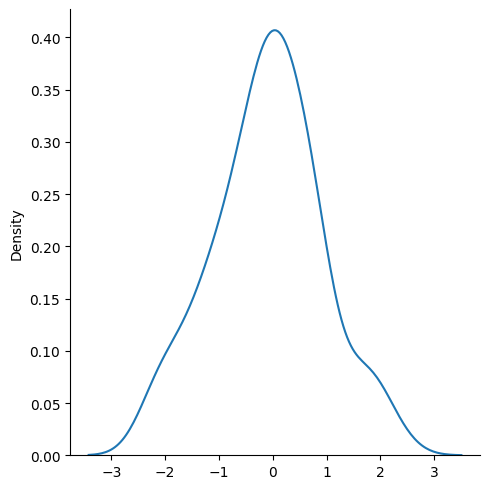

In [48]:
# Gaussian Distribution
sns.displot(data_points,kind='kde')

In [49]:
# Lognormal Distribution 
gfg = np.random.lognormal(0,1,90)
gfg

array([ 2.0303837 ,  2.76932113,  0.74504085,  1.02150141,  0.70568606,
        1.6685895 ,  0.6291054 ,  1.08336056,  3.38296239,  0.88997861,
        0.73694507,  8.28460316,  0.81549464,  1.40654918,  0.16951242,
        2.37977314,  0.27688623,  0.68298713,  0.42832116,  3.74350572,
        2.10597463,  0.4213311 ,  0.75860522,  2.95785669,  0.25655871,
        0.99556735,  1.31066474, 11.64384241,  2.05068186,  0.98556108,
        0.61996057,  1.39469944,  2.5594567 ,  3.64620099,  0.52672169,
        3.32410993,  6.80575718,  1.04630344,  1.40943449,  0.32737821,
        1.06357653,  1.35809246,  3.28359281,  0.28579111,  0.5397553 ,
        0.97043602,  2.7350973 ,  1.53465131,  4.50404341,  0.80679218,
        1.35836488,  0.66456375,  3.34833594,  2.51555255,  0.34978268,
        0.95592714,  0.57108711,  1.17354088,  4.24212178,  0.18007409,
        1.93571516,  1.16247544,  1.02421291,  0.29859226,  2.90700733,
        0.45202571,  0.41592482,  1.41918882,  1.06652094,  2.00

In [50]:
np.log(gfg)

array([ 0.70822479,  1.01860221, -0.29431622,  0.02127351, -0.34858481,
        0.51197866, -0.46345646,  0.08006784,  1.21875177, -0.11655785,
       -0.30524192,  2.11439875, -0.20396043,  0.34113931, -1.77482908,
        0.86700517, -1.28414857, -0.38127926, -0.84788199,  1.32002253,
        0.74477837, -0.86433629, -0.27627377,  1.08446492, -1.36039776,
       -0.0044425 ,  0.27053445,  2.45477749,  0.71817235, -0.01454418,
       -0.4780994 ,  0.33267894,  0.93979501,  1.2936858 , -0.64108297,
        1.20120195,  1.9177689 ,  0.04526342,  0.34318855, -1.11663916,
        0.06163731,  0.30608111,  1.18893819, -1.25249412, -0.61663939,
       -0.0300098 ,  1.00616701,  0.4283032 ,  1.50497553, -0.21468917,
        0.30628168, -0.40862447,  1.20846349,  0.92249248, -1.05044322,
       -0.04507359, -0.56021352,  0.16002557,  1.44506356, -1.71438691,
        0.66047685,  0.15055173,  0.02392442, -1.20867632,  1.06712414,
       -0.79401622, -0.87725075,  0.35008545,  0.06440189,  0.69

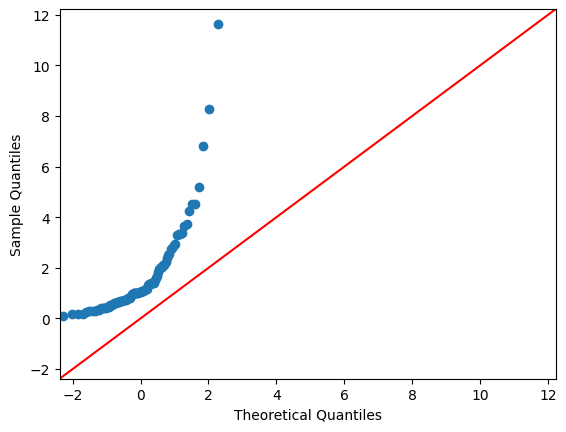

In [51]:
sm.qqplot(gfg,line='45')
py.show()

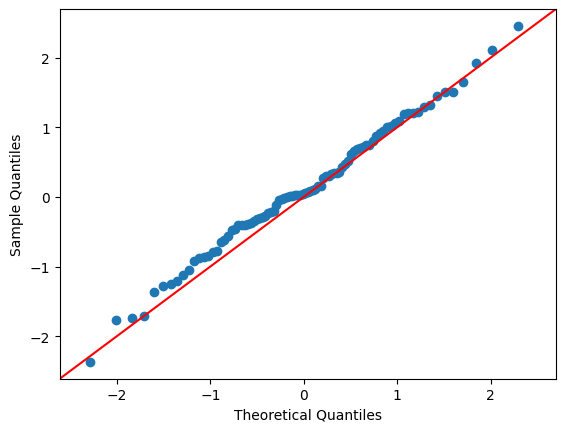

In [52]:
sm.qqplot(np.log(gfg),line='45')
py.show()

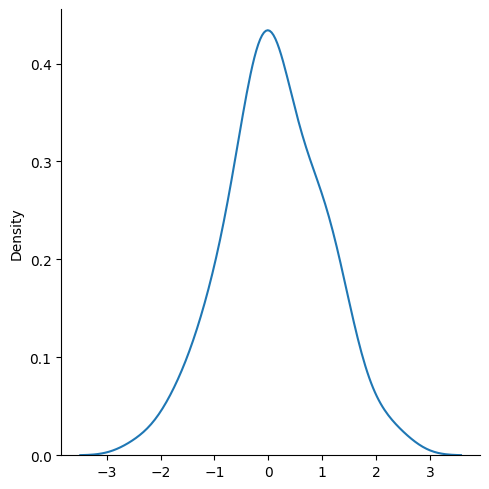

In [53]:
sns.displot(np.log(gfg),kind='kde')

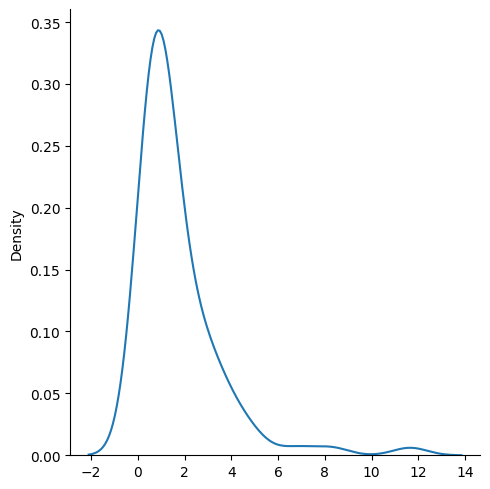

In [54]:
sns.displot(gfg,kind='kde')

## BOXCOX Transformation

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_11828\3296695521.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data,hist=False,kde=True,
d:\Softwares\Python\Python 3.11\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_11828\3296695521.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

Lambda value used for Transformation:0.2236369168584321


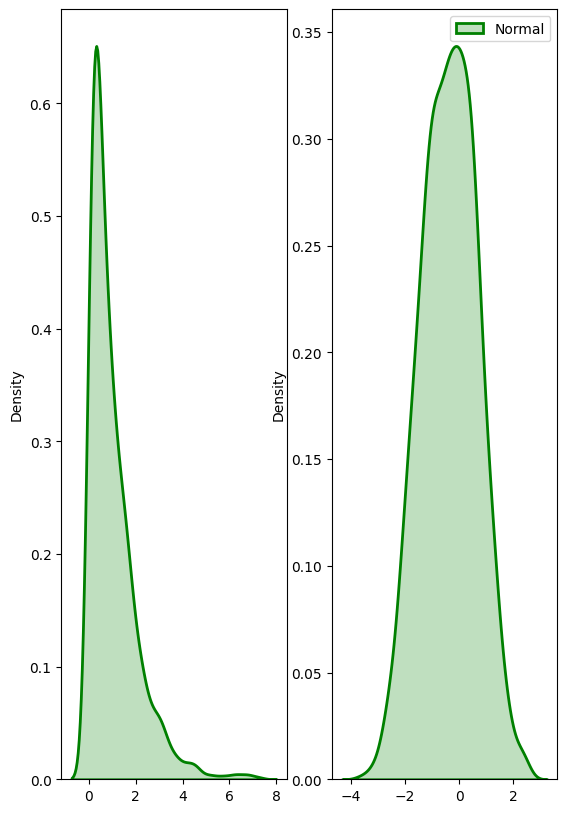

In [57]:
from scipy import stats
# Generate non normal data {Pareto Distribution}
original_data = np.random.exponential(size=1234)
# Transfrom training data & lmbda value {BOXCOX Transformation}
fitted_data, fitted_lambda = stats.boxcox(original_data)
# Creating axes to draw plots
fig,ax = plt.subplots(1,2)
#plotting the original data and fitted data
sns.distplot(original_data,hist=False,kde=True,
              kde_kws={'shade':True,'linewidth':2},
              label='Non-Normal',color='green',ax=ax[0])
sns.distplot(fitted_data,hist=False,kde=True,
            kde_kws={'shade':True,'linewidth':2},
            label="Normal",color='green',ax=ax[1])
# Adding legends to the subplots
plt.legend(loc='upper right')
# Rescaling the subplots
fig.set_figheight(5)
fig.set_figheight(10)
print(f"Lambda value used for Transformation:{fitted_lambda}")

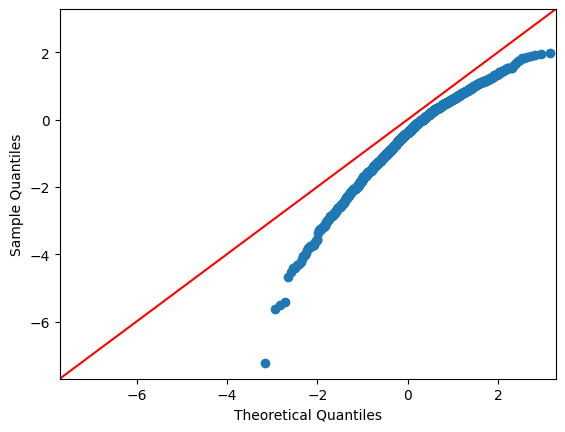

In [58]:
sm.qqplot(np.log(original_data),line='45')
py.show()

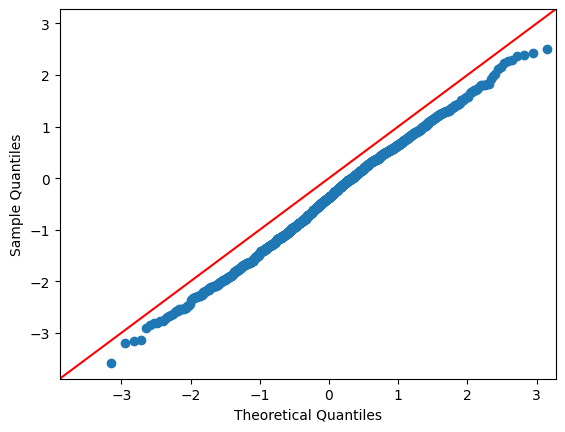

In [59]:
sm.qqplot(fitted_data,line='45')
py.show()

## Pareto Distribution

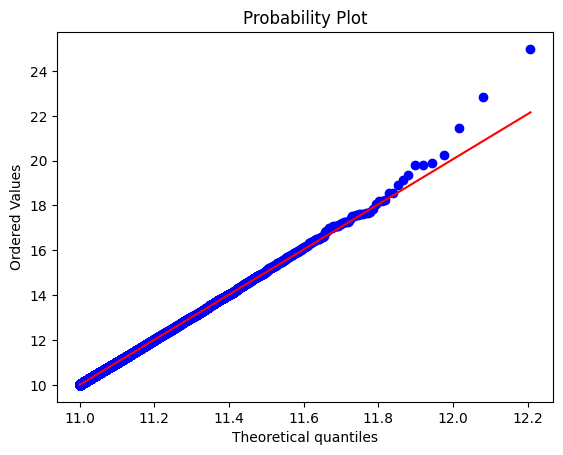

In [60]:
import pylab  
x_m = 10
alpha = 15 
size = 100000
samples = (np.random.pareto(alpha,size)+1)*x_m
stats.probplot(samples,dist='pareto',sparams=(15,10),plot=pylab)
plt.show()

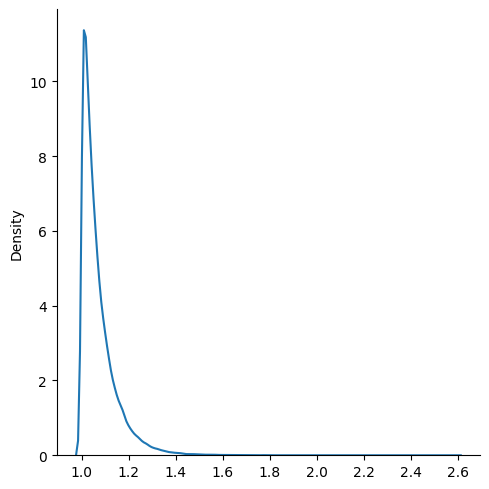

In [61]:
samples = (np.random.pareto(alpha,size)+1) # Pareto Curve
sns.displot(samples,kind='kde')

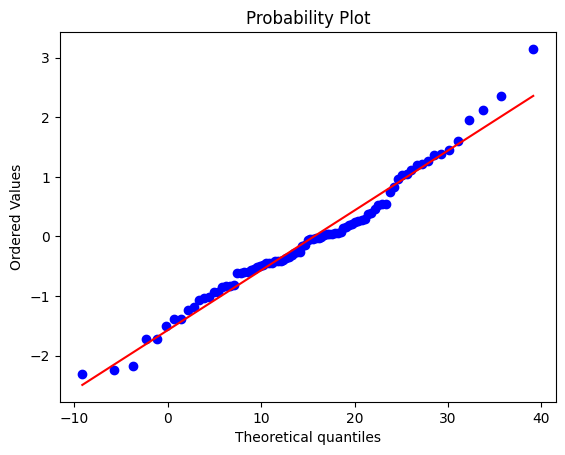

In [62]:
samples = np.random.normal(0,1,87) # Normal Distribution
stats.probplot(samples,dist='norm',sparams=(15,10),plot=pylab)
plt.show()

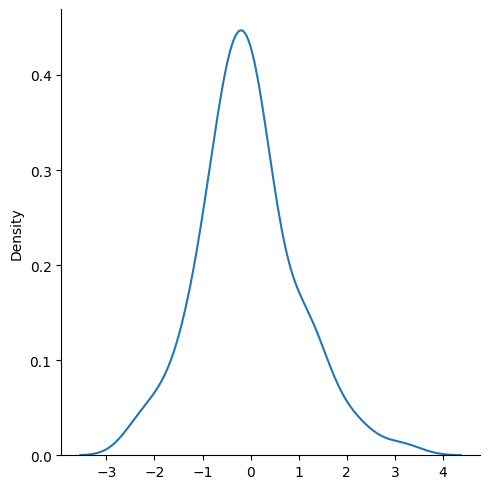

In [63]:
sns.displot(samples,kind='kde')

In [64]:
from scipy.stats import powerlognorm 
numargs = powerlognorm.numargs
a,b = 4.32,3.18
rv = powerlognorm(a,b)
print("RV :\n",rv)
quantile = np.arange(0.01,1,0.1)

RV :


In [65]:
# Random Variables 
R = powerlognorm.rvs(a,b)
print("Rnadom Variables : \n",R)

# PDF
R = powerlognorm.pdf(a,b,quantile)
print("\nProbability Distribution : \n",R)

Rnadom Variables : 
 0.22321930404485282

Probability Distribution : 
 [0.00000000e+000 8.14360522e-126 7.81567440e-037 1.63561014e-018
 8.34970138e-012 1.30638655e-008 7.72704791e-007 9.42026992e-006
 4.87663742e-005 1.52259891e-004]
